In [6]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [13]:
import pickle

import numpy as np
import pandas as pd

from neuclease.dvid import *
from neuclease.util import *

import hvplot.pandas

In [8]:
from neuclease import configure_default_logging
configure_default_logging()

In [11]:
vnc_master = ('emdata5.janelia.org:8400', '38f2605396ea495e99d2c6ec7b010a31')
vnc_seg = (*vnc_master, 'segmentation')

In [14]:
# # For now, faster to read from file than fetch from dvid
# psd_df = load_gary_psds('/nrs/flyem/huangg/vnc/synapses_v1.p')

In [35]:
point_df = partner_table_to_synapse_table(psd_df)

In [36]:
point_df.shape

(96579773, 5)

In [37]:
# with open('synapses/full_partner_df.pkl', 'wb') as f:
#     pickle.dump(psd_df, f)

# with open('synapses/point_df.pkl', 'wb') as f:
#    pickle.dump(point_df, f)

In [16]:
with open('synapses/full_partner_df.pkl', 'rb') as f:
    psd_df = pickle.load(f)
    
with open('synapses/point_df.pkl', 'rb') as f:
    point_df = pickle.load(f)

In [38]:
psd_df.shape, point_df.shape

((86228833, 14), (96579773, 5))

In [15]:
psd_df.head()

pre_id  z_pre  y_pre  x_pre kind_pre  conf_pre user_pre  \
0  240406077070379755  54662  27981   2795   PreSyn     0.836     $fpl   
1  240406077070379755  54662  27981   2795   PreSyn     0.836     $fpl   
2  240406077070379755  54662  27981   2795   PreSyn     0.836     $fpl   
3  241531976046086898  54918  27537   2802   PreSyn     0.785     $fpl   
4  241531976046086898  54918  27537   2802   PreSyn     0.785     $fpl   

              post_id  z_post  y_post  x_post kind_post  conf_post user_post  
0  240366494676945628   54653   27993    2780   PostSyn   0.990273      $fpl  
1  240445659509951205   54671   27991    2789   PostSyn   1.000000      $fpl  
2  240581998918241028   54702   27975    2820   PostSyn   0.206855      $fpl  
3  241575956527975151   54928   27545    2799   PostSyn   0.997869      $fpl  
4  241369248371313377   54881   27559    2785   PostSyn   0.221628      $fpl

In [16]:
point_df.shape

(96579773, 5)

In [17]:
point_df.head()

z      y     x   conf    kind
point_id                                             
240406077070379755  54662  27981  2795  0.836  PreSyn
241531976046086898  54918  27537  2802  0.785  PreSyn
231183374302055032  52565  28346  2680  0.925  PreSyn
231381286346820226  52610  28323  2690  0.856  PreSyn
231733130034154133  52690  28307  2709  0.842  PreSyn

In [34]:
psd_df['pre_id'].nunique() + psd_df['post_id'].nunique()

96579773

In [39]:
point_df['body'] = fetch_labels_batched(*vnc_seg, point_df[[*'zyx']].values, processes=8)

[2021-02-27 11:31:14,563] INFO Pre-sorting 96579773 coordinates by block index...
[2021-02-27 11:31:43,279] INFO Pre-sorting 96579773 coordinates by block index took 0:00:28.715115
[2021-02-27 11:31:46,992] INFO Fetching labels from DVID...


[2021-02-27 11:52:13,249] INFO Fetching labels from DVID took 0:20:26.255763


In [40]:
point_df.head()

z      y     x   conf    kind         body
point_id                                                          
240406077070379755  54662  27981  2795  0.836  PreSyn        16698
241531976046086898  54918  27537  2802  0.785  PreSyn        22450
231183374302055032  52565  28346  2680  0.925  PreSyn  42050899901
231381286346820226  52610  28323  2690  0.856  PreSyn  42050902170
231733130034154133  52690  28307  2709  0.842  PreSyn        10055

In [47]:
# with open('synapses/point_df-with-bodies-38f260-unlocked-20210227.pkl', 'wb') as f:
#     pickle.dump(point_df, f)

In [41]:
syn_counts = body_synapse_counts(point_df)
syn_counts['SynWeight'] = syn_counts.eval('5*PreSyn + PostSyn')

In [42]:
syn_counts = syn_counts.sort_values('SynWeight', ascending=False)

In [64]:
syn_counts['sw_rank'] = np.arange(1, 1+len(syn_counts), dtype=int)

In [65]:
syn_counts

PreSyn  PostSyn  SynWeight   sw_rank
body                                             
10082          5939    27868      57563         1
10016          5783    17151      46066         2
10139          4882    21510      45920         3
10124          3588    23772      41712         4
10031          4920    14827      39427         5
...             ...      ...        ...       ...
25720198842       0        1          1  24703192
25720198985       0        1          1  24703193
25720199030       0        1          1  24703194
25720199042       0        1          1  24703195
28122230779       0        1          1  24703196

[24703196 rows x 4 columns]

In [43]:
psd_df.head()

pre_id  z_pre  y_pre  x_pre kind_pre  conf_pre user_pre  \
0  240406077070379755  54662  27981   2795   PreSyn     0.836     $fpl   
1  240406077070379755  54662  27981   2795   PreSyn     0.836     $fpl   
2  240406077070379755  54662  27981   2795   PreSyn     0.836     $fpl   
3  241531976046086898  54918  27537   2802   PreSyn     0.785     $fpl   
4  241531976046086898  54918  27537   2802   PreSyn     0.785     $fpl   

              post_id  z_post  y_post  x_post kind_post  conf_post user_post  
0  240366494676945628   54653   27993    2780   PostSyn   0.990273      $fpl  
1  240445659509951205   54671   27991    2789   PostSyn   1.000000      $fpl  
2  240581998918241028   54702   27975    2820   PostSyn   0.206855      $fpl  
3  241575956527975151   54928   27545    2799   PostSyn   0.997869      $fpl  
4  241369248371313377   54881   27559    2785   PostSyn   0.221628      $fpl

In [57]:
conn_df = psd_df[['pre_id', 'post_id']]
conn_df = conn_df.merge(point_df['body'], 'left', left_on='pre_id', right_index=True)
conn_df = conn_df.merge(point_df['body'], 'left', left_on='post_id', right_index=True, suffixes=['_pre', '_post'])

In [58]:
conn_df = conn_df.merge(syn_counts['SynWeight'].rename('body_pre_sw'), 'left', left_on='body_pre', right_index=True)
conn_df = conn_df.merge(syn_counts['SynWeight'].rename('body_post_sw'), 'left', left_on='body_post', right_index=True)

In [66]:
conn_df = conn_df.merge(syn_counts['sw_rank'].rename('body_pre_sw_rank'), 'left', left_on='body_pre', right_index=True)
conn_df = conn_df.merge(syn_counts['sw_rank'].rename('body_post_sw_rank'), 'left', left_on='body_post', right_index=True)

In [69]:
conn_df['sw_min'] = conn_df[['body_pre_sw', 'body_post_sw']].values.min(axis=1)
conn_df['sw_max'] = conn_df[['body_pre_sw', 'body_post_sw']].values.max(axis=1)

In [70]:
ranks = np.sort(conn_df[['body_pre_sw_rank', 'body_post_sw_rank']].values, axis=1)
conn_df['sw_min_rank'] = ranks[:, 0]
conn_df['sw_max_rank'] = ranks[:, 1]

In [60]:
conn_df['sw_min_body_id'] = conn_df['body_pre']
conn_df['sw_max_body_id'] = conn_df['body_pre']

pre_is_max = conn_df.eval('body_pre_sw >= body_post_sw')
post_is_max = conn_df.eval('body_pre_sw < body_post_sw')

conn_df.loc[pre_is_max,  'sw_min_body_id'] = conn_df.loc[pre_is_max,  'body_post']
conn_df.loc[post_is_max, 'sw_max_body_id'] = conn_df.loc[post_is_max, 'body_post']

In [113]:
conn_df = conn_df.merge(syn_counts[['PreSyn', 'PostSyn']].rename(columns={'PreSyn': 'body_pre_total_tbars', 'PostSyn': 'body_pre_total_psds'}),
                        'left', left_on='body_pre', right_index=True)

conn_df = conn_df.merge(syn_counts[['PreSyn', 'PostSyn']].rename(columns={'PreSyn': 'body_post_total_tbars', 'PostSyn': 'body_post_total_psds'}),
                        'left', left_on='body_post', right_index=True)

In [114]:
conn_df

pre_id             post_id  body_pre    body_post  \
0         240406077070379755  240366494676945628     16698        20381   
1         240406077070379755  240445659509951205     16698        57807   
2         240406077070379755  240581998918241028     16698  43688825802   
3         241531976046086898  241575956527975151     22450        18817   
4         241531976046086898  241369248371313377     22450  44095597090   
...                      ...                 ...       ...          ...   
86228828  224568732184258417  224524751675107214     75444  40886614105   
86228829  224568732184258417  224599518530807665     75444  40886615625   
86228830  224568732184258417  224524751696078691     75444  40886616571   
86228831  224568732184258417  224432392704665444     75444  40886616854   
86228832  224568732184258417  224599518505641814     75444  40886617367   

          body_pre_sw  body_post_sw  sw_min  sw_max  sw_min_body_id  \
0                3237          2940    2940    3237           20381   
1                3237             1       1    3237           57807   
2                3237             1       1    3237     43688825802   
3                1700          2475    1700    2475           22450   
4                1700             1       1    1700     44095597090   
...               ...           ...     ...     ...             ...   
86228828           16             1       1      16     40886614105   
86228829           16             1       1      16     40886615625   
86228830           16             1       1      16     40886616571   
86228831           16             1       1      16     40886616854   
86228832           16             1       1      16     40886617367   

          sw_max_body_id  body_pre_sw_rank  body_post_sw_rank  sw_min_rank  \
0                  16698              7499               8423         7499   
1                  16698              7499           18817552         7499   
2                  16698              7499           11429941         7499   
3                  18817             13870              10097        10097   
4                  22450             13870           13948373        13870   
...                  ...               ...                ...          ...   
86228828           75444            213063           10948476       213063   
86228829           75444            213063           10948413       213063   
86228830           75444            213063           10948403       213063   
86228831           75444            213063           10948584       213063   
86228832           75444            213063           10948567       213063   

          sw_max_rank  body_pre_total_tbars  body_pre_total_psds  \
0                8423                   580                  337   
1            18817552                   580                  337   
2            11429941                   580                  337   
3               13870                   311                  145   
4            13948373                   311                  145   
...               ...                   ...                  ...   
86228828     10948476                     2                    6   
86228829     10948413                     2                    6   
86228830     10948403                     2                    6   
86228831     10948584                     2                    6   
86228832     10948567                     2                    6   

          body_post_total_tbars  body_post_total_psds  
0                           508                   400  
1                             0                     1  
2                             0                     1  
3                           432                   315  
4                             0                     1  
...                         ...                   ...  
86228828                      0                     1  
86228829                      0                     1  
86228830  

In [100]:
conn_df_sorted = conn_df.sort_values(['sw_max_rank', 'sw_min_rank']).reset_index(drop=True)

In [121]:
nondupes = ~(conn_df_sorted['pre_id'].duplicated())
conn_df_sorted['num_tbars'] = nondupes.cumsum()
conn_df_sorted['minimally_connected_tbar_frac'] = conn_df_sorted['num_tbars'] / nondupes.sum()

In [134]:
flattened_bodies = pd.Series(conn_df_sorted[['body_pre', 'body_post']].values.reshape(-1), name='body').to_frame()
flattened_bodies = flattened_bodies.merge(syn_counts, 'left', on='body')
dupes = flattened_bodies['body'].duplicated()
flattened_bodies.loc[dupes, 'PreSyn'] = 0
flattened_bodies.loc[dupes, 'PostSyn'] = 0
flattened_bodies['traced_tbars'] = flattened_bodies['PreSyn'].cumsum()
flattened_bodies['traced_psds'] = flattened_bodies['PostSyn'].cumsum()

In [151]:
flattened_bodies

body  PreSyn  PostSyn  SynWeight   sw_rank  traced_tbars  \
0                10082    5939    27868      57563         1          5939   
1                10082       0        0      57563         1          5939   
2                10082       0        0      57563         1          5939   
3                10082       0        0      57563         1          5939   
4                10082       0        0      57563         1          5939   
...                ...     ...      ...        ...       ...           ...   
172457661  25720199030       0        1          1  24703194      10350940   
172457662        54229       0        0        234     27112      10350940   
172457663  25720199042       0        1          1  24703195      10350940   
172457664        10422       0        0      14133       716      10350940   
172457665  28122230779       0        1          1  24703196      10350940   

           traced_psds  
0                27868  
1                27868  
2                27868  
3                27868  
4                27868  
...                ...  
172457661     86228831  
172457662     86228831  
172457663     86228832  
172457664     86228832  
172457665     86228833  

[172457666 rows x 7 columns]

In [152]:
conn_df_sorted['cumulative_traced_tbars'] = flattened_bodies['traced_tbars'].values.reshape(-1, 2).max(axis=1)
conn_df_sorted['cumulative_traced_psds'] = flattened_bodies['traced_psds'].values.reshape(-1, 2).max(axis=1)

In [153]:
conn_df_sorted['traced_tbar_frac'] = conn_df_sorted['cumulative_traced_tbars'] / syn_counts['PreSyn'].sum()
conn_df_sorted['traced_psd_frac'] = conn_df_sorted['cumulative_traced_psds'] / syn_counts['PostSyn'].sum()

In [154]:
conn_df_sorted.head()

pre_id             post_id  body_pre  body_post  body_pre_sw  \
0  184269421821314336  184238635502028071     10082      10082        57563   
1  187158936200174401  187075373316463425     10082      10082        57563   
2  185118233913736759  185056661277261367     10082      10016        57563   
3  202565289177531391  202503716564124634     10082      10016        57563   
4  181146811147241309  181133616990930800     10082      10016        57563   

   body_post_sw  sw_min  sw_max  sw_min_body_id  sw_max_body_id  ...  \
0         57563   57563   57563           10082           10082  ...   
1         57563   57563   57563           10082           10082  ...   
2         46066   46066   57563           10016           10082  ...   
3         46066   46066   57563           10016           10082  ...   
4         46066   46066   57563           10016           10082  ...   

      tbar_frac  conn_count     conn_frac  cumulative_traced_tbars  \
0  9.660958e-08           1  1.159705e-08                     5939   
1  1.932192e-07           2  2.319410e-08                     5939   
2  2.898287e-07           3  3.479115e-08                    11722   
3  3.864383e-07           4  4.638820e-08                    11722   
4  4.830479e-07           5  5.798524e-08                    11722   

   cumulative_traced_psds  traced_conn_count  traced_conn_frac  \
0                   27868                  1      1.159705e-08   
1                   27868                  2      2.319410e-08   
2                   45019                  3      3.479115e-08   
3                   45019                  4      4.638820e-08   
4                   45019                  5      5.798524e-08   

   minimally_connected_tbar_frac  traced_tbar_frac  traced_psd_frac  
0                   9.660958e-08          0.000574         0.000323  
1                   1.932192e-07          0.000574         0.000323  
2                   2.898287e-07          0.001132         0.000522  
3                   3.864383e-07          0.001132         0.000522  
4                   4.830479e-07          0.001132         0.000522  

[5 rows x 25 columns]

In [155]:
conn_df_sorted['traced_conn_count'] = 1 + conn_df_sorted.index
conn_df_sorted['traced_conn_frac'] = conn_df_sorted['conn_count'] / len(conn_df_sorted)

In [171]:
_df = conn_df_sorted
_df = _df[['sw_max_rank', 'traced_tbar_frac', 'minimally_connected_tbar_frac', 'traced_psd_frac', 'traced_conn_frac']]
_df = _df.rename(columns={
    'sw_max_rank': 'body size ranking',
    'traced_tbar_frac': 'tbars on traced bodies',
    'minimally_connected_tbar_frac': 'traced tbars with a traced output',
    'traced_psd_frac': 'psds on traced bodies',
    'traced_conn_frac': 'fully traced connections'
})
# Aim for plotting 20k points
step = len(_df) // 20_000
_df = _df.iloc[::step]

p = _df.hvplot(_df.columns[0], _df.columns[1:].tolist(), legend='bottom_right', ylabel='fraction', width=800, height=500)

# Hide annoying legend title
# https://discourse.holoviz.org/t/removing-legend-title/1317/2
p.get_dimension('Variable').label = ''
p

:NdOverlay   [Variable]
   :Curve   [body size ranking]   (value)

In [172]:
_df = conn_df_sorted
_df = _df[['sw_max_rank', 'traced_tbar_frac', 'minimally_connected_tbar_frac', 'traced_psd_frac', 'traced_conn_frac']]

# Zoom in on left-hand region
_df = _df.query('sw_max_rank < 50_000')

_df = _df.rename(columns={
    'sw_max_rank': 'body size ranking',
    'traced_tbar_frac': 'tbars on traced bodies',
    'minimally_connected_tbar_frac': 'traced tbars with a traced output',
    'traced_psd_frac': 'psds on traced bodies',
    'traced_conn_frac': 'fully traced connections'
})

# Aim for plotting 20k points
step = len(_df) // 20_000
_df = _df.iloc[::step]

p = _df.hvplot(_df.columns[0], _df.columns[1:].tolist(), legend='bottom_right', ylabel='fraction', width=800, height=500)

# Hide annoying legend title
# https://discourse.holoviz.org/t/removing-legend-title/1317/2
p.get_dimension('Variable').label = ''
p

:NdOverlay   [Variable]
   :Curve   [body size ranking]   (value)

In [91]:
syn_counts.sort_values('SynWeight', ascending=False)['PreSyn'].iloc[:5000].sum()

4956516

In [112]:
syn_counts.iloc[:100_000]['PreSyn'].sum() / syn_counts['PreSyn'].sum()

0.9268408473046892

In [111]:
#help(conn_df_sorted.iloc[::100_000].hvplot)

In [ ]:
conn_df_sorted.iloc[::100_000].hvplot

In [106]:
syn_counts.iloc[10_000_000]

PreSyn              0
PostSyn             2
SynWeight           2
sw_rank      10000001
Name: 42490582299, dtype: int64

In [107]:
syn_counts.iloc[11_000_000]

PreSyn              0
PostSyn             1
SynWeight           1
sw_rank      11000001
Name: 40884696844, dtype: int64

In [92]:
4956516 / syn_counts['PreSyn'].sum()

0.4788469453015861

In [55]:
conn_df.shape

(86228833, 6)

In [173]:
len(syn_counts)

24703196

In [21]:
sv_counts = fetch_supervoxels_for_bodies(*locked_seg, syn_counts.iloc[:100_000].index, processes=16).groupby('body').size()

In [22]:
sv_counts

body
10003             81
10007            242
10009           2424
10015           3884
10023           3017
                ... 
841369765372      15
841369765374       5
841369765377      83
841369765378       9
841369765379      14
Length: 90000, dtype: int64

In [23]:
syn_counts.reset_index().query('body > 1e6').head(100)

body  PreSyn  PostSyn  SynWeight
625   841369760968    1222     8924      15034
940   841369761326    1038     7585      12775
1132  841369760257    1472     4535      11895
1272  841369762663    1278     4885      11275
1295  841369762773     843     6948      11163
...            ...     ...      ...        ...
6501  841369760494     399     1728       3723
6524  841369762166     248     2473       3713
6543  841369761156     338     2011       3701
6557  841369761047     620      596       3696
6586  841369761121     400     1685       3685

[100 rows x 4 columns]

In [31]:
syn_counts.index.duplicated().sum()

0

In [24]:
syn_counts.query('SynWeight >= 10').shape

(525756, 3)

In [25]:
syn_counts.query('PreSyn >= 2 or PostSyn >= 10').shape

(507703, 3)

In [26]:
syn_counts['SynWeight'].sort_values(ascending=False).iloc[:20_000].reset_index(drop=True).hvplot()

:Curve   [index]   (SynWeight)

In [27]:
syn_counts.query('PreSyn >= 2').shape[0]
syn_counts['PreSyn'].sort_values(ascending=False).iloc[:20_000].reset_index(drop=True).hvplot()

:Curve   [index]   (PreSyn)

In [28]:
print(syn_counts.query('PostSyn >= 10').shape[0])
syn_counts['PostSyn'].sort_values(ascending=False).iloc[:20_000].reset_index(drop=True).hvplot()

366206


:Curve   [index]   (PostSyn)

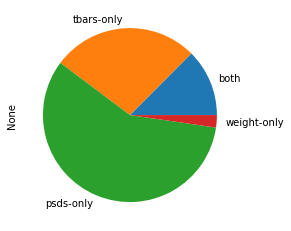

In [29]:
categories = {}
# How many bodies meet both the tbar criteria and psd criteria?
categories['both'] = syn_counts.query('PreSyn >= 2 and PostSyn >= 10').shape[0]

# How many bodies meet the tbar criteria without meeting the psd criteria?
categories['tbars-only'] = syn_counts.query('PreSyn >= 2 and PostSyn < 10').shape[0]

# Reverse: How many meet the psd critera, but not the tbar criteria?
# (Should be more)
categories['psds-only'] = syn_counts.query('PreSyn < 2 and PostSyn >= 10').shape[0]

# How many meet the SynWeight criteria but not the other two?
# (Not many, it turns out.)
categories['weight-only'] = syn_counts.query('PreSyn < 2 and PostSyn < 10 and SynWeight > 10').shape[0]

pd.Series(categories).plot(kind='pie');

In [51]:
from neuclease.dvid.annotation import body_synapse_counts, fetch_synapses_in_batches, fetch_labels_batched

locked_seg = ('emdata5.janelia.org:8400', '192d1d72abc04b768ac0d23d48f25cac', 'segmentation')

point_df, partner_df = fetch_synapses_in_batches(*locked_seg[:2], 'synapses')
point_df['body'] = fetch_labels_batched(*locked_seg, point_df[[*'zyx']].values, processes=16)

syn_counts = body_synapse_counts(point_df)

syn_counts['SynWeight'] = syn_counts.eval('5*PreSyn + PostSyn')
syn_counts = syn_counts.sort_values('SynWeight', ascending=False)
syn_counts['PreSyn_cumul_frac'] = syn_counts['PreSyn'].cumsum() / syn_counts['PreSyn'].sum()
syn_counts['PostSyn_cumul_frac'] = syn_counts['PostSyn'].cumsum() / syn_counts['PostSyn'].sum()

syn_counts.query('PreSyn_cumul_frac <= 0.9').to_csv(f'synapses/anchors-{locked_seg[1][:5]}.csv', index=True, header=True)

In [56]:
print(locked_seg)

('emdata5.janelia.org:8400', '192d1d72abc04b768ac0d23d48f25cac', 'segmentation')


In [33]:
syn_counts['PreSyn'].sum(), syn_counts['PostSyn'].sum()

(10350940, 86228833)

In [34]:
syn_counts['PreSyn'].sum() + syn_counts['PostSyn'].sum()

96579773

In [35]:
syn_counts[['PreSyn', 'PostSyn']].sum()

PreSyn     10350940
PostSyn    86228833
dtype: int64

In [36]:
86228833 / 10350940

8.330531623214897

In [43]:
root_seg = 'emdata5.janelia.org:8400', '1ec355123bf94e588557a4568d26d258', 'segmentation'
box = fetch_volume_box(*root_seg)
point_df, partner_df = fetch_synapses_in_batches(*root_seg[:2], 'synapses', box)

In [44]:
point_df.shape

(86717045, 6)

In [45]:
point_df.head()

z     y      x     kind      conf  user
point_id                                                 
334266860858023  76  7308  27303  PostSyn  0.999993  $fpl
334266892315298  76  7323  27298  PostSyn  0.999992  $fpl
351858356936567  80  6979  24439  PostSyn  0.543207  $fpl
351858371616622  80  6986  24430  PostSyn  0.605399  $fpl
351858371616640  80  6986  24448   PreSyn  0.831000  $fpl

In [46]:
point_df['kind'].value_counts()

PostSyn    86228833
PreSyn       488212
Fake              0
Name: kind, dtype: int64